# Adult Census Income Prediction
 
## Define the Problem
 The goal here is to predict wether a person has an income of more than 50k or not.
 This is basically a binary classification problem where a person is classified into the
>50K group or <=50K group. 
  

In [803]:
__author__ = "Sujitha Sunkara"
__email__ = "murthysujitha@gmail.com"

In [729]:
# importing libraries

import pandas as pd
import seaborn as sns
import numpy as np
from numpy import nan
import missingno as msno
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

## Load the data


In [730]:

df = pd.read_csv("/Users/sujithasunkara/Documents/Kaggle/Income prediction/adult.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [731]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [732]:
# Checking unique values for all variables
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [733]:
df['fnlwgt'].unique()
df['education'].unique()
df['education-num'].unique()
df['marital-status'].unique()
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [734]:
df['relationship'].unique()
df['race'].unique()
df['sex'].unique()
df['country'].unique()


array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [735]:
df =df.replace(' ?',nan)

In [736]:
# Checking for null values
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

In [737]:
type(df.workclass)

pandas.core.series.Series

In [738]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [739]:
df.shape

(32561, 15)

<AxesSubplot:>

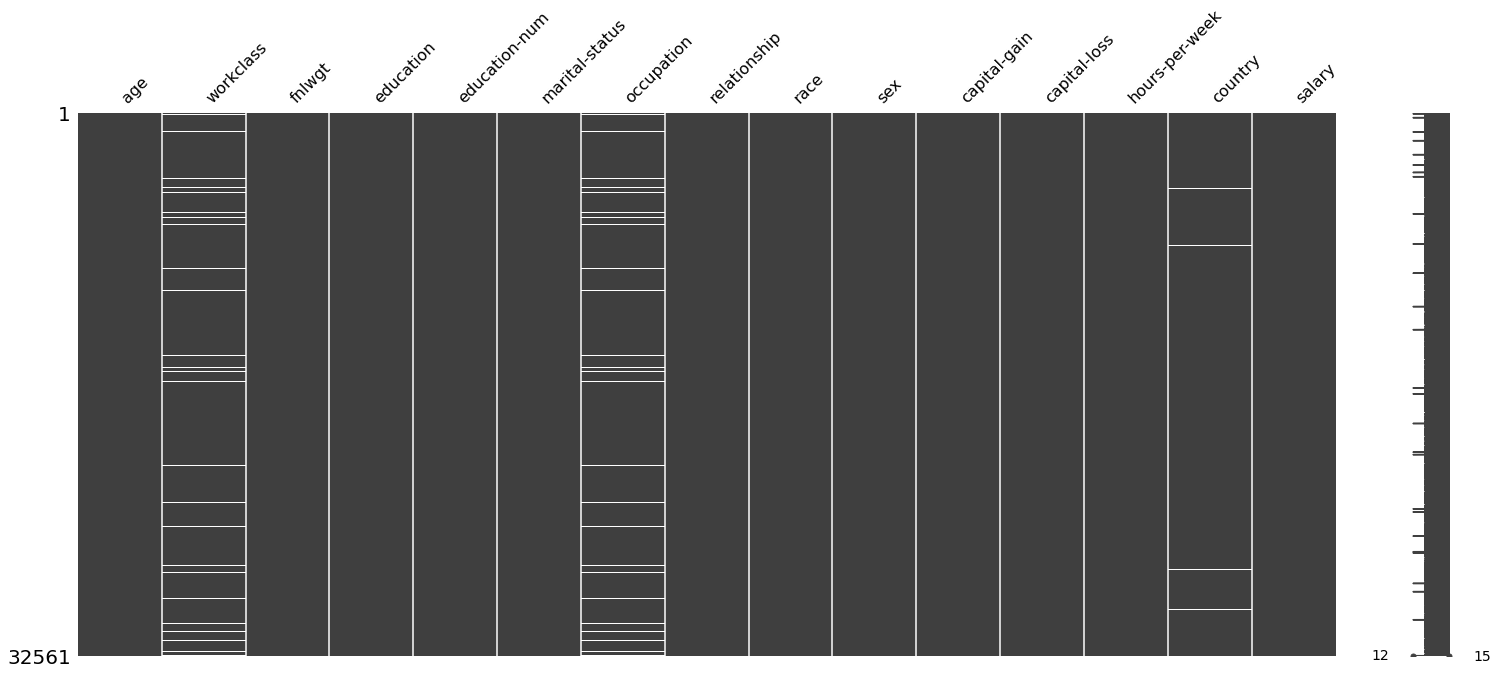

In [740]:
msno.matrix(df)

we can notice from graph as workplace, occupation and country has missing values.
We have large datadet with more than 32500 values and missed data is around 1800. so we will drop the values.

In [741]:
df= df.dropna()


## Exploratory Data Analysis

In [743]:
## summarize the target variable
df['salary'].value_counts()

 <=50K    22654
 >50K      7508
Name: salary, dtype: int64

In [744]:
## Percentage of values in target variable
counter = Counter(df['salary'])
for k,v in counter.items():
    per = v / len(df['salary']) * 100
    print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class= <=50K, Count=22654, Percentage=75.108%
Class= >50K, Count=7508, Percentage=24.892%


 <=50K    22654
 >50K      7508
Name: salary, dtype: int64

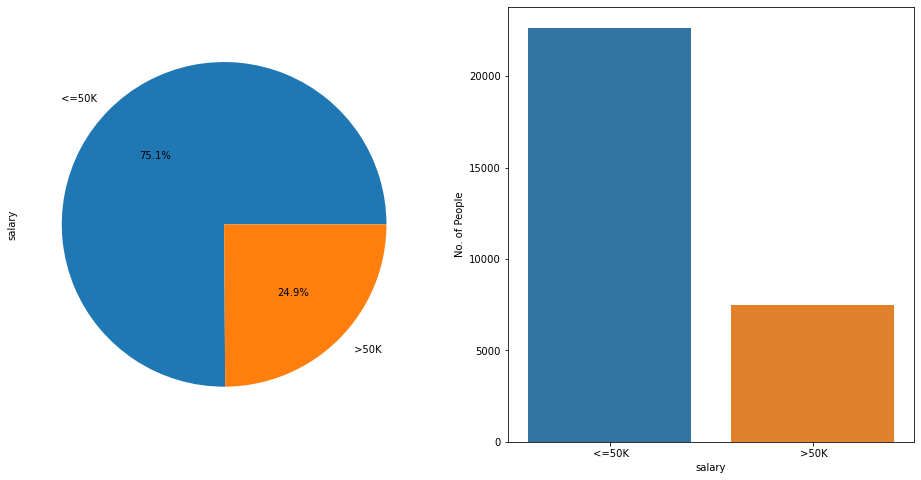

In [745]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
df['salary'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(x='salary',data=df)
plt.ylabel('No. of People')
df['salary'].value_counts()


From the above graph it clearly says 75% of the data is having <=50k income 

In [746]:
## Converting salary variable into integer
df['salary']= df['salary'].map({' <=50K': 0,' >50K':1}).astype(int)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [747]:
# Age variable is considering as different groups
def age_group(x):
    x= int(x)
    x= abs(x)
    if (x<=18):
        return "Less than 18"
    if (18<x<30):
        return "19-30"
    if (30<x<50):
        return "30-50"
    if (50<x<70 ):
        return "50-70"
    else:
        return "Greater than 70"
        

In [748]:
df['age_group']= df['age'].apply(age_group)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,age_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,30-50
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,Greater than 70
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,30-50
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,50-70
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,19-30


In [ ]:
### Univariate Analysis


In [749]:
df_category = ['workclass','education','marital-status','occupation','relationship','race','sex',"age_group"]

In [750]:
## Univariate analysis 
def univariate(df,col):
    plt.figure (figsize = (16,8))
    
    if df[col].dtype !='int64' or df[col]!='float64':
        plt.subplot(1,2,1)
        df[col].value_counts().plot.pie(autopct='%1.1f%%')
        plt.subplot(1,2,2)
        sns.countplot(x= col,data=df)
        plt.xlabel(col)
        plt.ylabel('No. of People')
        plt.xticks(rotation =90)
       
    plt.show()

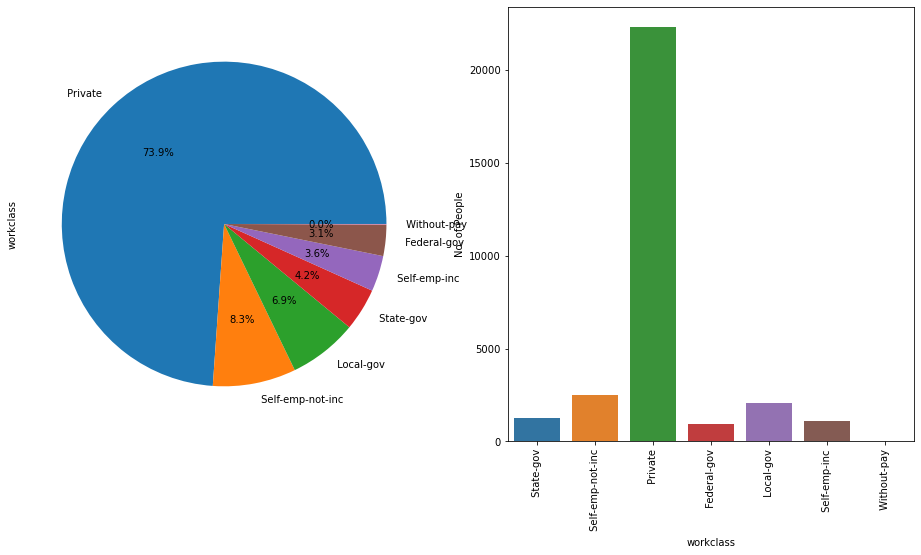

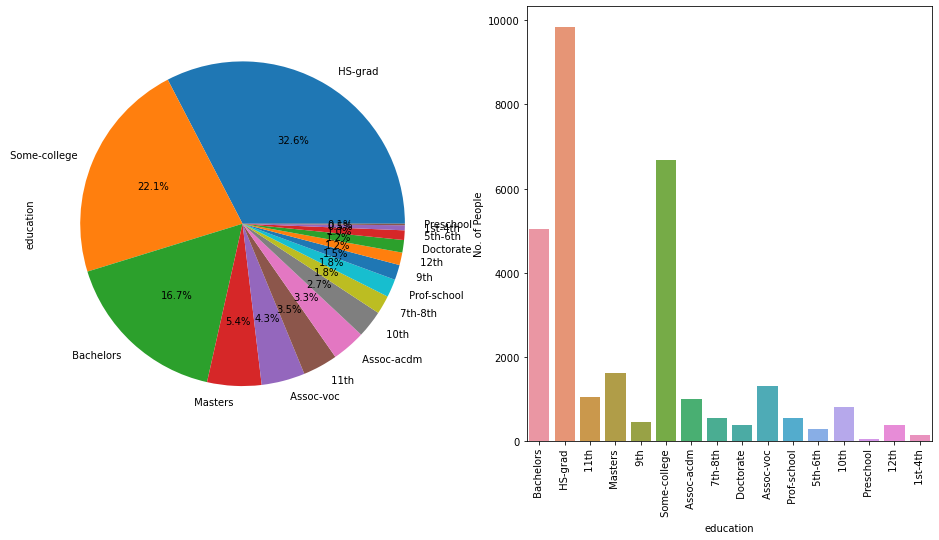

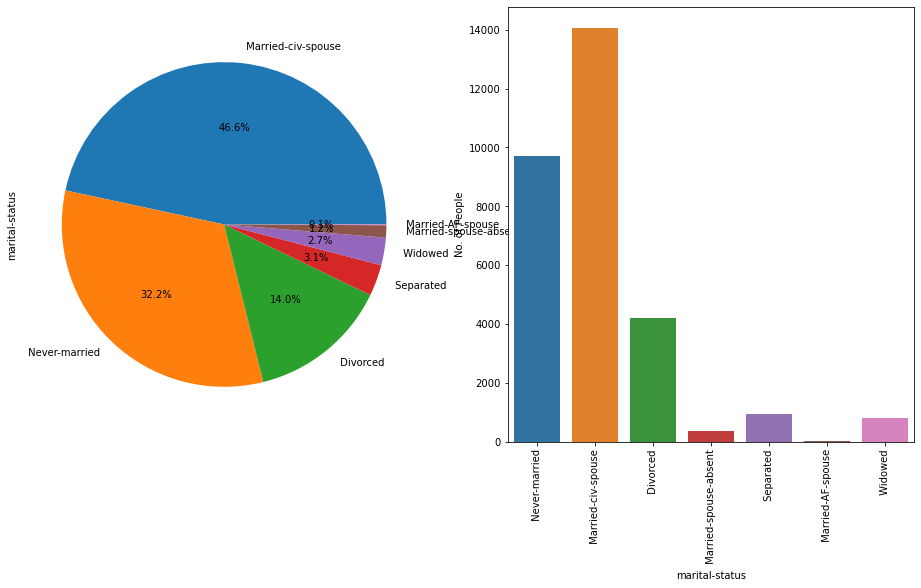

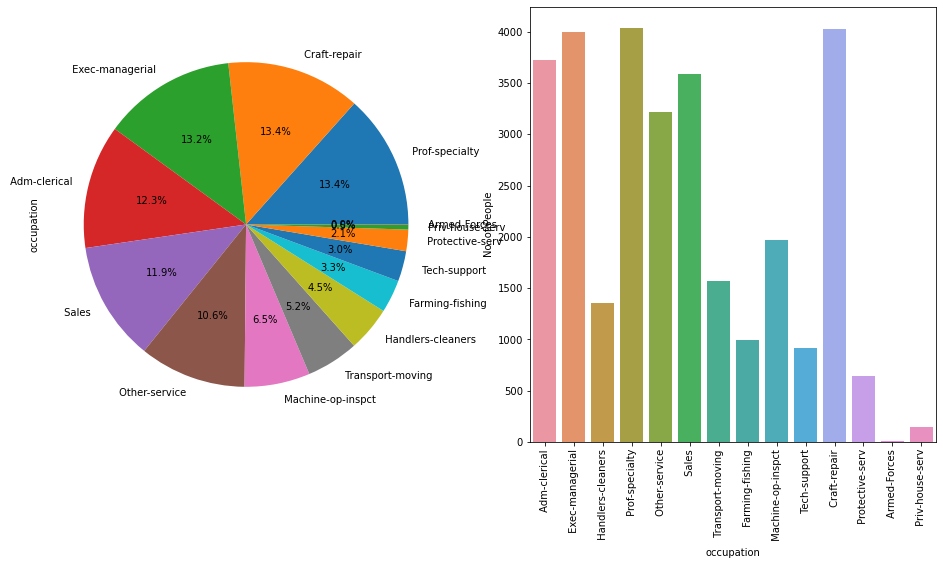

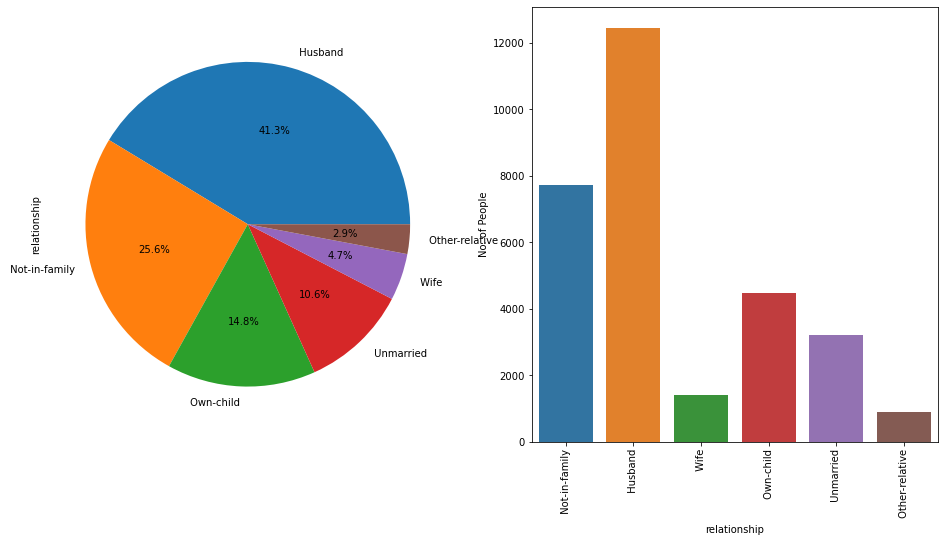

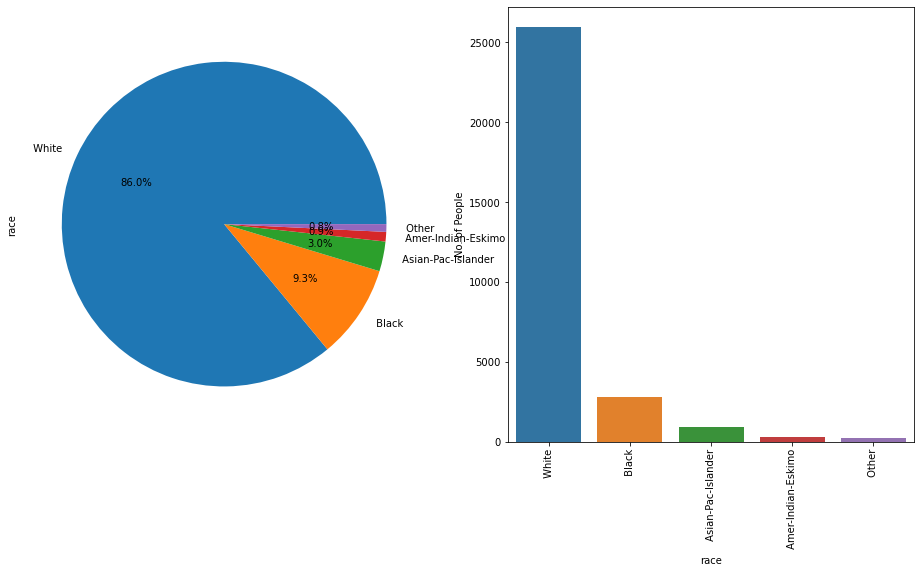

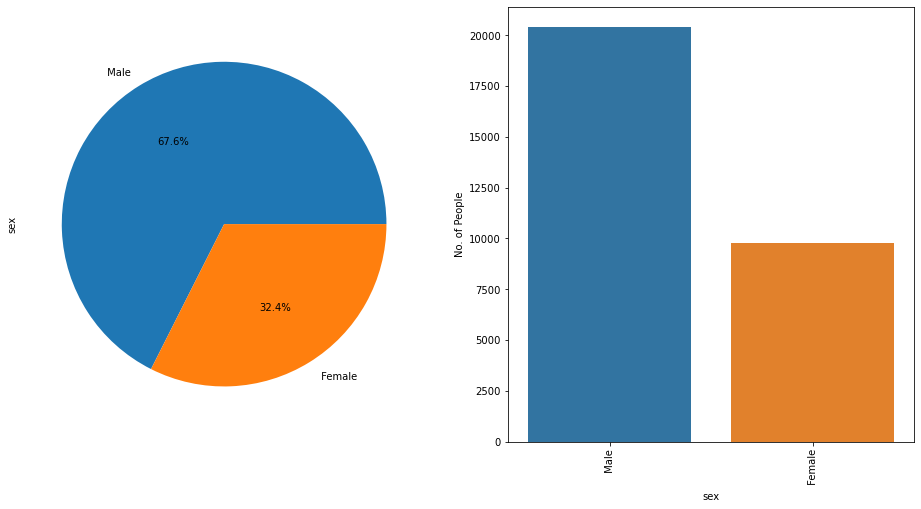

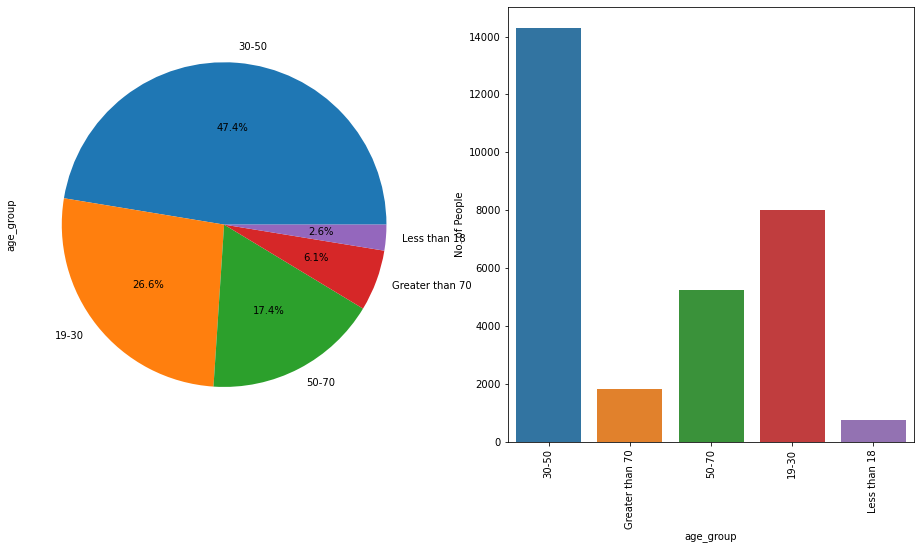

In [751]:
for features in df_category:
    univariate(df,features)

In [752]:
def salary_mean(df,col1,col2):
    x = df[[col1,col2]].groupby([col1]).mean()
    return x

In [753]:
for features in df_category:
    print(salary_mean(df,features,'salary'))


                     salary
workclass                  
 Federal-gov       0.387063
 Local-gov         0.294630
 Private           0.218792
 Self-emp-inc      0.558659
 Self-emp-not-inc  0.285714
 State-gov         0.268960
 Without-pay       0.000000
                 salary
education              
 10th          0.071951
 11th          0.056298
 12th          0.076923
 1st-4th       0.039735
 5th-6th       0.041667
 7th-8th       0.062837
 9th           0.054945
 Assoc-acdm    0.253968
 Assoc-voc     0.263198
 Bachelors     0.421491
 Doctorate     0.746667
 HS-grad       0.164329
 Masters       0.564229
 Preschool     0.000000
 Prof-school   0.749077
 Some-college  0.200060
                          salary
marital-status                  
 Divorced               0.107262
 Married-AF-spouse      0.476190
 Married-civ-spouse     0.454959
 Married-spouse-absent  0.083784
 Never-married          0.048324
 Separated              0.070288
 Widowed                0.096735
                   

In [754]:
##barplot
def plot_fetures(df, col):
    plt.figure (figsize = (16,8))
    

    if df[col].dtype !='int64' or df[col]=='salary':
        plt.subplot(1,2,1)
        col_mean = df.groupby(col)['salary'].mean()
        col_mean.sort_values().plot(kind='bar')
        plt.xlabel(col)
        plt.ylabel("salary")
        plt.title("Salary prediction")
        
        plt.subplot(1,2,2)
        sns.countplot(x=col, hue= 'salary', data = df)
        
        plt.xticks(rotation =90)
    
    plt.show()

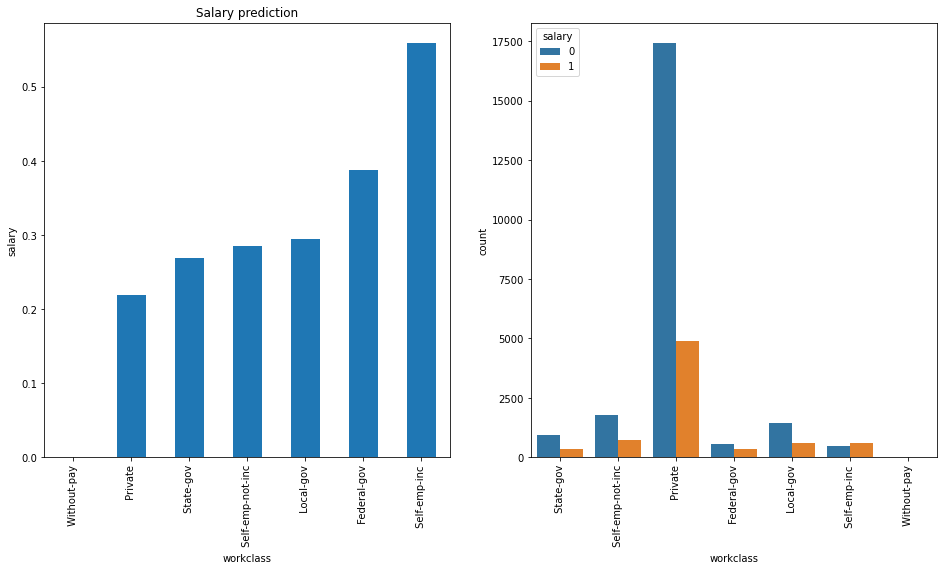

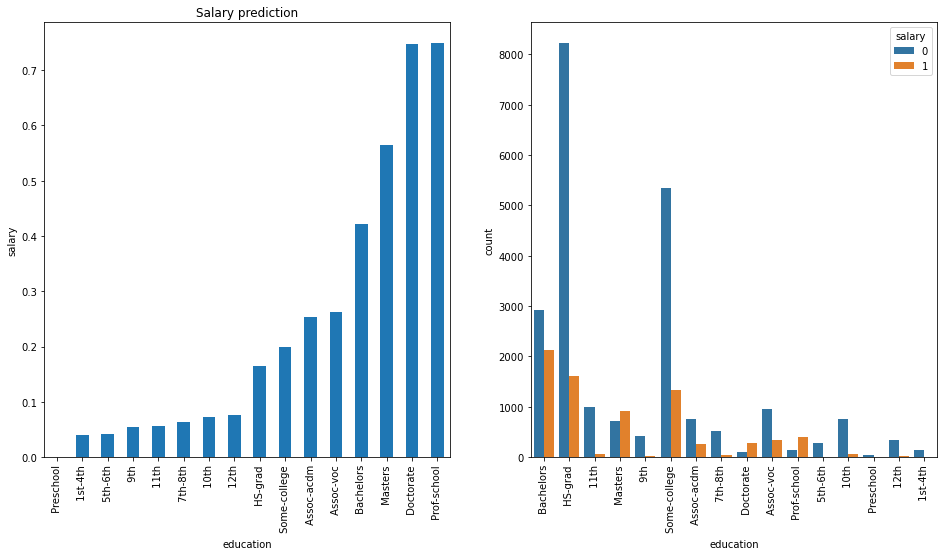

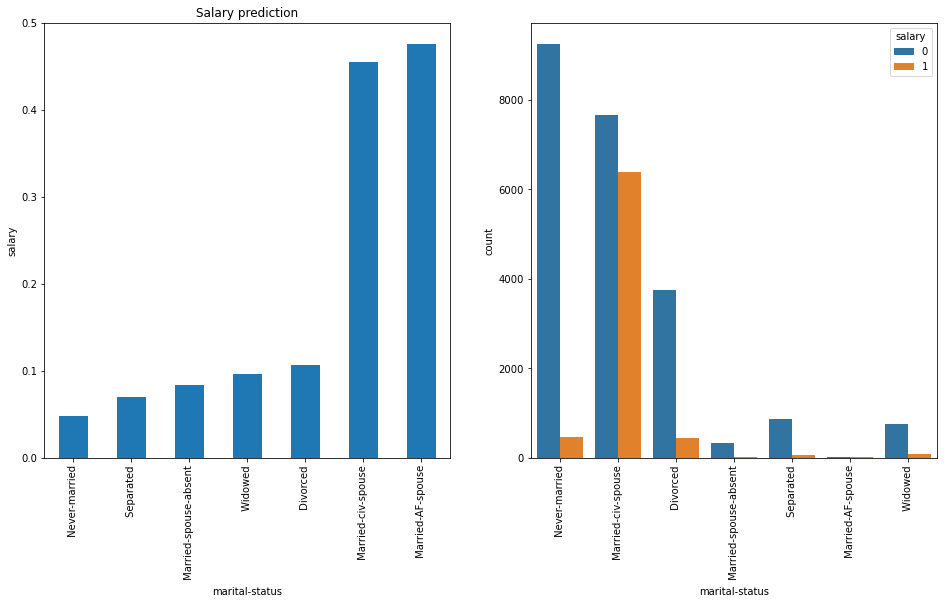

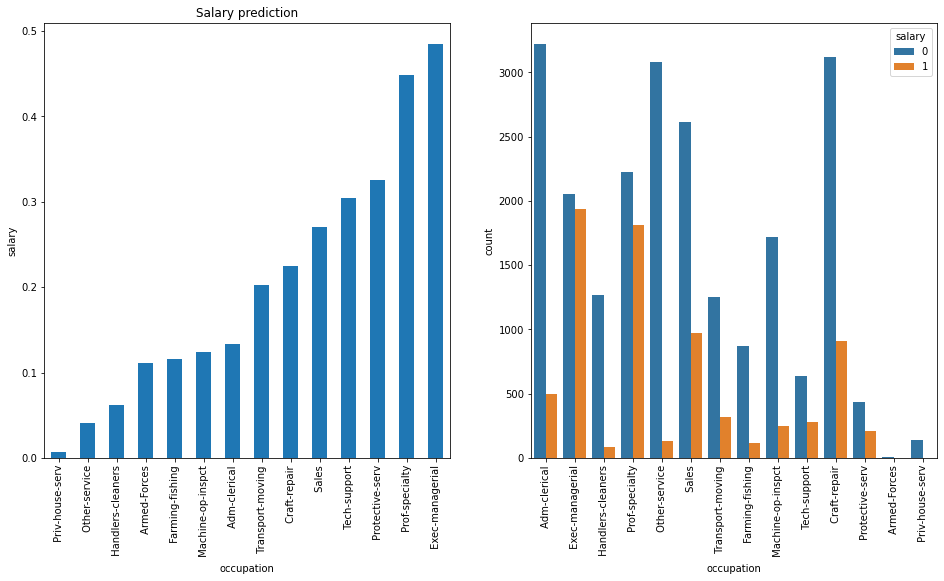

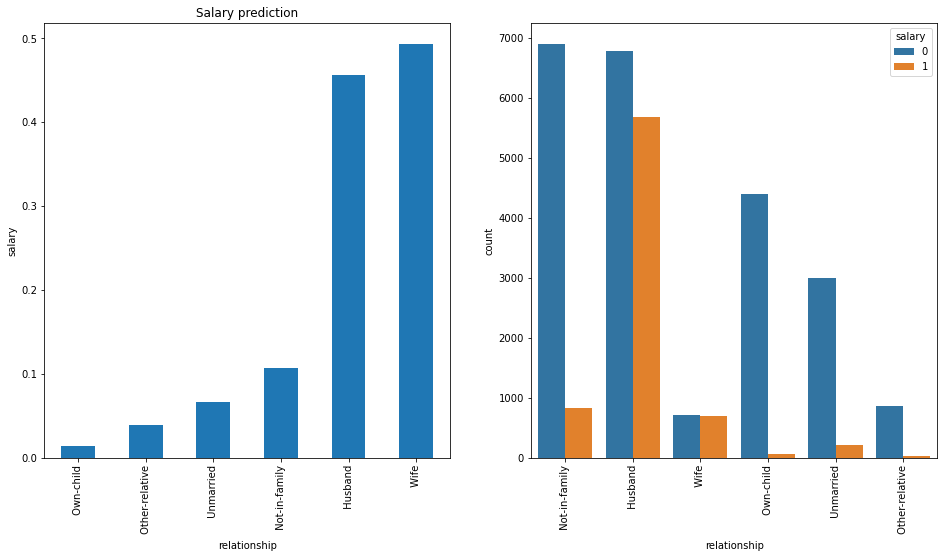

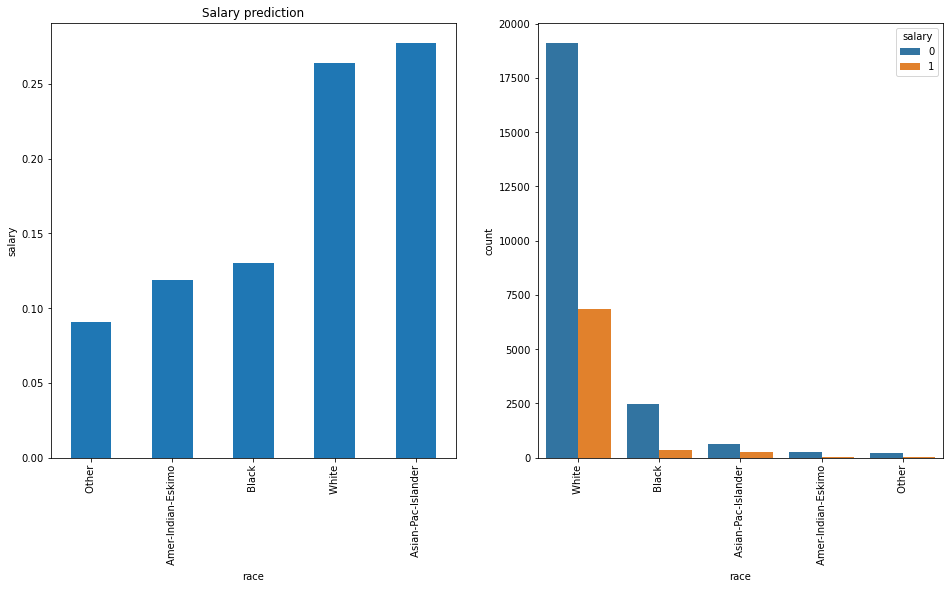

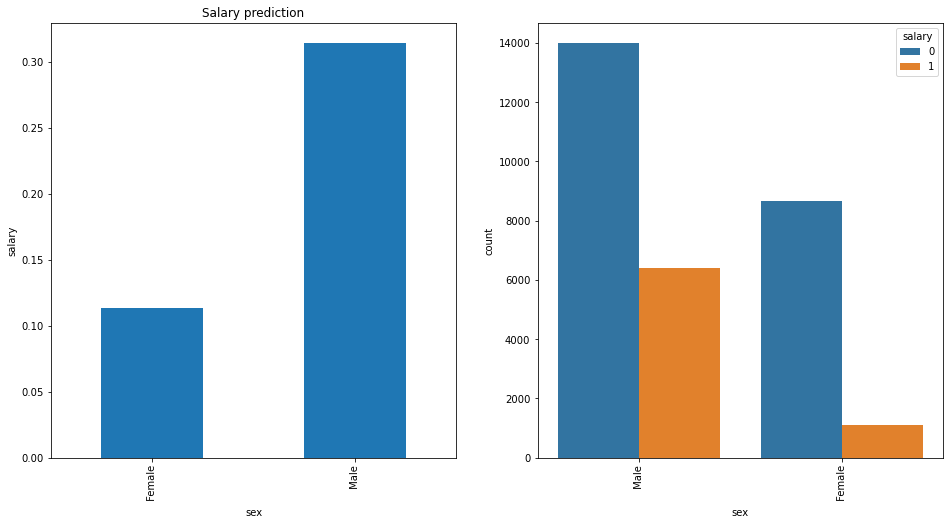

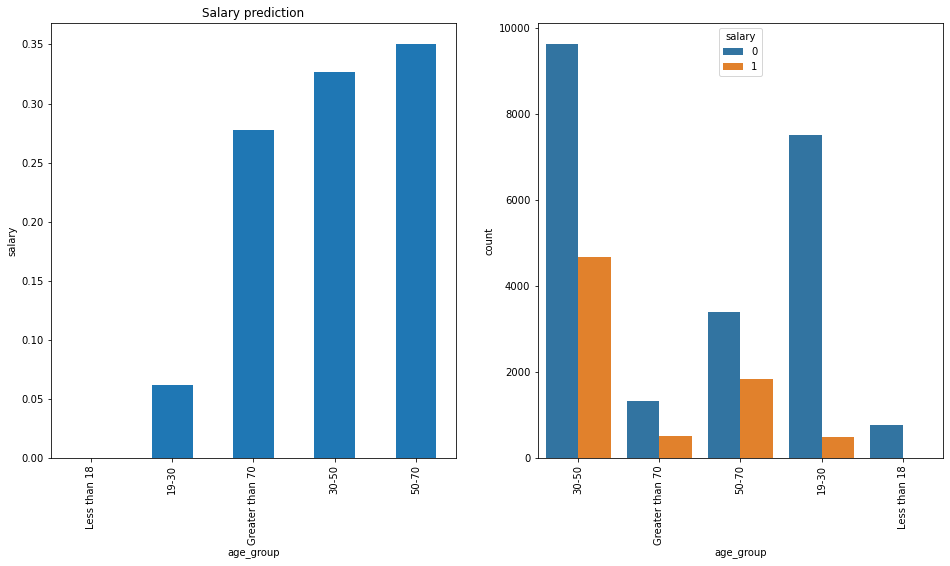

In [755]:
for features in df_category:
    plot_fetures(df,features)

In [756]:

df_numerical = ['age','fnlwgt','education-num','capital-gain', 'capital-loss', 'hours-per-week']
type(df.age)

pandas.core.series.Series

In [757]:
def plots(df,col):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        
        sns.distplot(df[col])
        plt.subplot(1,2,2)
        sns.boxplot(x='salary', y = col, data =df )
    plt.show()

/Users/sujithasunkara/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


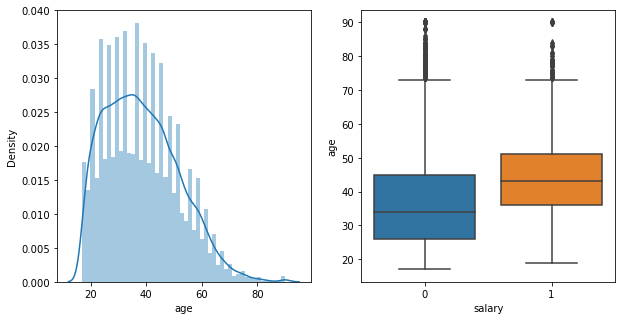

/Users/sujithasunkara/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


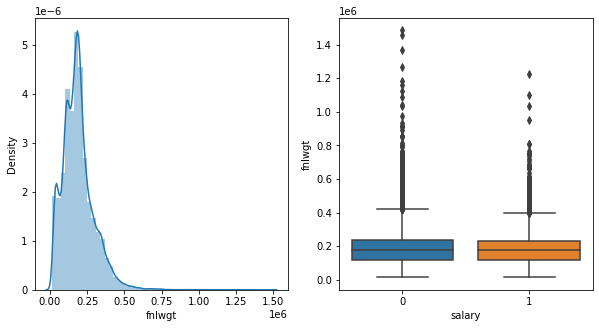

/Users/sujithasunkara/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


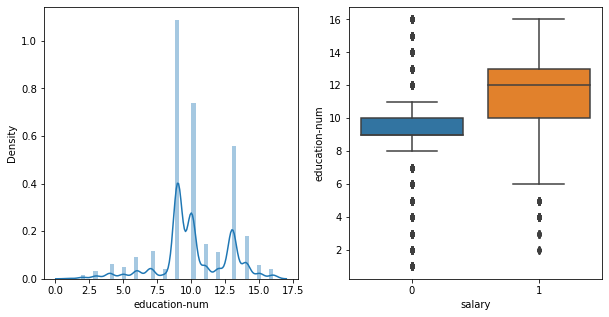

/Users/sujithasunkara/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


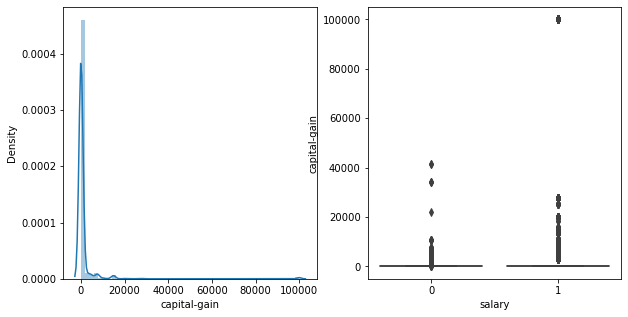

/Users/sujithasunkara/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


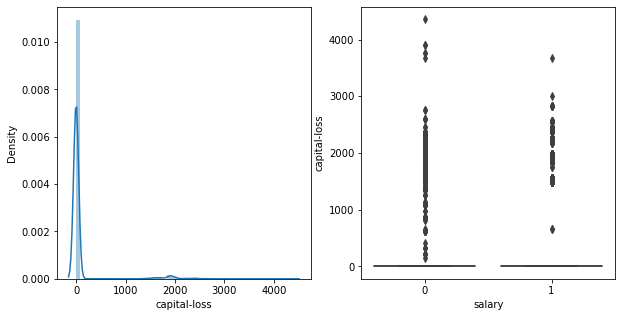

/Users/sujithasunkara/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


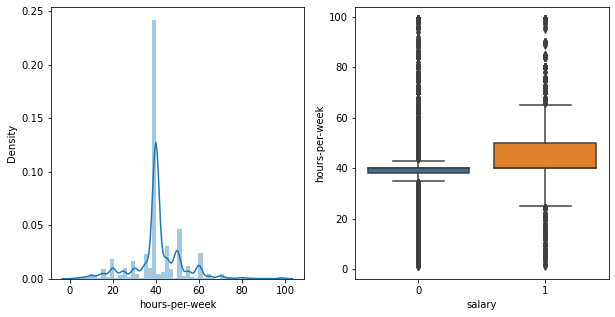

In [758]:
for features in df_numerical:
    plots(df,features)

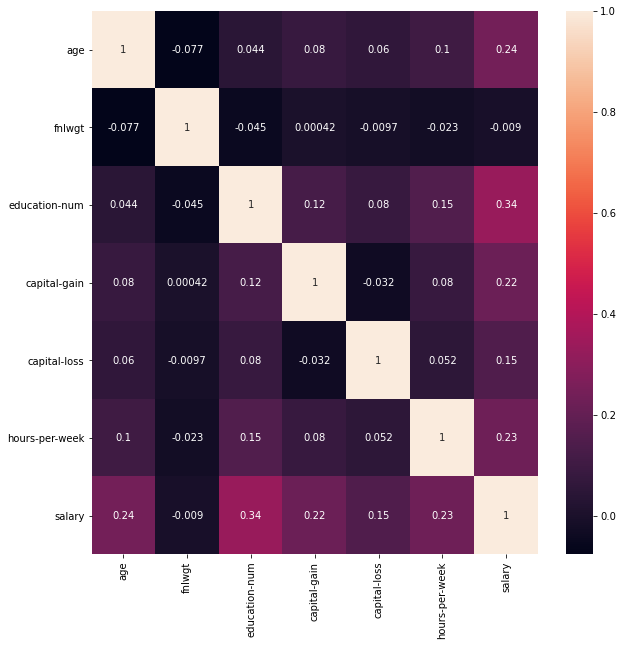

In [759]:
##Correlation between variables
corr_matrix = df.corr()
plt.figure(figsize =(10,10))
sns.heatmap(corr_matrix, annot = True)
plt.xticks(rotation =90)
plt.yticks(rotation =0)
plt.show()


other than fnlwgt all other variables have positive correltion

In [760]:
## converting all categorical variables into numerical variables 

In [761]:
def f(x):
    if x['workclass'] == ' Federal-gov' or x['workclass']== ' Local-gov' or x['workclass']==' State-gov': return 'govt'
    elif x['workclass'] == ' Private':return 'private'
    elif x['workclass'] == ' Self-emp-inc' or x['workclass'] == ' Self-emp-not-inc': return 'self_employed'
    else: return 'without_pay'
    
    
df['employment_type']=df.apply(f, axis=1)
df['employment_type']= df['employment_type'].map({'without_pay':0,'self_employed':1,'private':2,'govt':3}).astype(int)


In [762]:


df['relationship'] = df['relationship'].map({' Unmarried':0,' Wife':1,' Husband':2,' Not-in-family':3,' Own-child':4,
                                            ' Other-relative':5}).astype(int)
df['marital-status'] = df['marital-status'].replace([' Divorced',' Married-spouse-absent',' Never-married',' Separated',' Widowed'],'Single')
df['marital-status'] = df['marital-status'].replace([' Married-AF-spouse',' Married-civ-spouse'],'Couple')


In [763]:
df[['marital-status','relationship','salary']].groupby(['marital-status','relationship']).mean()

salary
marital-status relationship          
Couple         1             0.493599
               2             0.455669
               3             0.285714
               4             0.178571
               5             0.142857
Single         0             0.066314
               3             0.106198
               4             0.011182
               5             0.023377

In [764]:
df['marital-status'] = df['marital-status'].map({'Single':0,'Couple':1}).astype(int)

In [765]:
df['occupation'] = df['occupation'].map({' Adm-clerical':0,' Exec-managerial':1, ' Handlers-cleaners':2,
       ' Prof-specialty':3, ' Other-service':4, ' Sales':5, ' Transport-moving':6,
       ' Farming-fishing':7, ' Machine-op-inspct':8, ' Tech-support':9,
       ' Craft-repair':10, ' Protective-serv':11, ' Armed-Forces':12,
       ' Priv-house-serv':13}).astype(int)

In [766]:
df['race']= df['race'].map({' White':0,' Amer-Indian-Eskimo':1,' Asian-Pac-Islander':2,' Black':3,' Other':4}).astype(int)
    

In [767]:
df['country']= np.where(df['country']==' United-States',1,0)

In [768]:
df['sex'] = np.where(df['sex']==' Male',0,1)

In [769]:
df['capital-gain'] = np.where(df['capital-gain']>1,1,0)

In [770]:
df['capital-loss'] = np.where(df['capital-loss']>1,1,0)

In [771]:
df['age_group'].unique()

array(['30-50', 'Greater than 70', '50-70', '19-30', 'Less than 18'],
      dtype=object)

In [772]:
df['age_group'] = df['age_group'].map({'Less than 18':0,'19-30':1,'30-50':2,'50-70':3,'Greater than 70':4})

In [773]:
df.drop(['workclass','education','age','fnlwgt'],axis =1, inplace = True)

In [774]:
df.head()

,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,age_group,employment_type
0,13,0,0,3,0,0,1,0,40,1,0,2,3
1,13,1,1,2,0,0,0,0,13,1,0,4,1
2,9,0,2,3,0,0,0,0,40,1,0,2,2
3,7,1,2,2,3,0,0,0,40,1,0,3,2
4,13,1,3,1,3,1,0,0,40,0,0,1,2


In [775]:
## Establish a base line:


In [776]:
## Train_test split
X = df.drop(columns=['salary'])
y = df.salary


In [777]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [778]:
y_test.shape

(6033,)

In [779]:
##baseline model
import statistics
guess = statistics.mode(df['salary'])
y_pred_base = [guess]*len(y_test)
score = accuracy_score(y_test,y_pred_base)
print(f'Base line accuracy {round(score*100,0)}%')

Base line accuracy 75.0%


In [780]:
# Create dummy classifer
dummy = DummyClassifier(strategy='uniform', random_state=1)

# "Train" model
dummy.fit(x_train, y_train)
# Get accuracy score
dummy.score(x_test, y_test)  

0.5027349577324715

In [781]:
##Model 
model = LogisticRegression()
# Train model with training data
model.fit(x_train,y_train)

/Users/sujithasunkara/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [782]:
## prediction on our test data
y_pred = model.predict(x_test)

In [783]:
##Accuracy
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8340792308967346


In [784]:
# Random forest 
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [785]:
# Train model with training data
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [786]:
## prediction on our test data
y_pred1 = rf.predict(x_test)
y_pred1

array([0, 0, 0, ..., 1, 0, 0])

In [787]:
acc_Rforest = accuracy_score(y_test,y_pred1)
acc_Rforest

0.8247969501077408

In [790]:
## Decision tree
tree = DecisionTreeClassifier(max_depth=11)
tree = tree.fit(x_train, y_train)
# PREDICTIONS
tree_predictions = tree.predict(x_test)
acc_tree = accuracy_score(y_test,tree_predictions)
acc_tree

0.827780540361346

In [791]:
#Support vector machines

svm = svm.SVC(kernel='linear')
svm = svm.fit(x_train, y_train)


In [792]:
# PREDICTIONS
svm_predictions = svm.predict(x_test)
acc_suppvm = accuracy_score(y_test,svm_predictions)
acc_suppvm #

0.8319244157135753

In [794]:
##KNN
knn = KNeighborsClassifier(n_neighbors=40)
knn = knn.fit(x_train, y_train)

In [796]:
knn_predictions = knn.predict(x_test)
acc_knn = accuracy_score(y_test,knn_predictions)
acc_knn 

0.820321564727333

In [798]:
###naive bayes
### Categorical Naive bayes
cnb = CategoricalNB()
cnb = cnb.fit(x_train, y_train)

# PREDICTIONS
cnb_predictions = cnb.predict(x_test)
acc_cnb = accuracy_score(y_test,cnb_predictions)
acc_cnb # show test set score

0.7997679429802752

In [800]:
##Gaussian naive bayes
gnb = GaussianNB()
gnb = gnb.fit(x_train, y_train)

In [802]:
gnb_predictions = gnb.predict(x_test)
acc_gnb = accuracy_score(y_test,gnb_predictions)
acc_gnb # test set score

0.7821979114868225